**Linear SVM or Simple SVM** 

is used for data that is linearly separable. A dataset is termed linearly separable data if it can be classified into two classes using a single straight line, and the classifier is known as the linear SVM classifier. It’s most commonly used for tasks involving linear regression and classification.



**Nonlinear SVM or Kernel SVM also known as Kernel SVM**, 

is a type of SVM that is used to classify nonlinearly separated data, or data that cannot be classified using a straight line. It has more flexibility for nonlinear data because more features can be added to fit a hyperplane instead of a two-dimensional space.



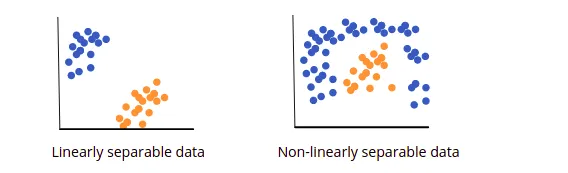

=============================================================

**Import the required modules**

In [1]:
# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**import the data set and divide it into input and output variables**

In [2]:
# importing the dataset
dataset = pd.read_csv('customer_purchases.csv')

# split the data into inputs and outputs
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

In [3]:
dataset.head() #customer had purchased the product or not.

Age  Salary  Purchased
0   19   19000          0
1   35   20000          0
2   26   43000          0
3   27   57000          0
4   19   76000          0

**Training and testing linear SVM model**

In [5]:
#Splitting the data set

# training and testing data
from sklearn.model_selection import train_test_split

# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)

Before feeding the training data to our model, we need to scale the given data so that the outlier will not affect the output class.

In [6]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

**Training model**

In [7]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set linear as it is binary class
classifier = SVC(kernel='linear')

# traininf the model
classifier.fit(X_train, y_train)

SVC(kernel='linear')

**Testing the model**

In [8]:
# testing the model
y_pred = classifier.predict(X_test)

**Accuracy**

In [9]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.88


**Linear classifier visualization**

**Visualizing trained data**

Let’s visualize the model trained by the Linear Kernel to see how the model has been trained visually.

Notice that there is a linear boundary between the two classes because we have specified the Kernel to be linear.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


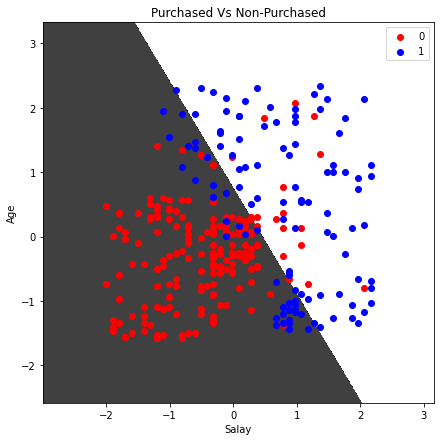

In [10]:
# importing the modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# plotting the fgiure
plt.figure(figsize = (7,7))

# assigning the input values
X_set, y_set = X_train, y_train

# ploting the linear graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)

# labeling the graph
plt.title('Purchased Vs Non-Purchased')
plt.xlabel('Salay')
plt.ylabel('Age')
plt.legend()
plt.show()

**Visualing predicted data**

Similarly, we can also visualize the predictions of our model, bypassing the testing dataset.

You can consider any testing point in the black area as Not-purchased and any point in the while area as Purchased.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


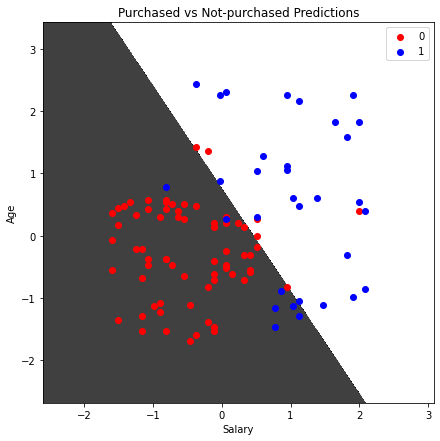

In [11]:
# ploting graph of size 7,7
plt.figure(figsize = (7,7))

# assigning the testing dataset
X_set, y_set = X_test, y_test

# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'blue'))(i), label = j)

# labelling the graphe
plt.title('Purchased vs Not-purchased Predictions')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend()
plt.show()

=====================================================================

=====================================================================

=====================================================================

=====================================================================

# Training and testing nonlinear SVM model

We know that the Linear Kernel performs best when the data is linear, but we use other kernels when the information is nonlinear. Let’s train our model using the Radial Basis Function kernel and visualize results.

**train the model and then will test the model to see the accuracy**

In [12]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
classifier1 = SVC(kernel='rbf')

# traininf the model
classifier1.fit(X_train, y_train)

# testing the model
y_pred = classifier1.predict(X_test)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.93


Note: the accuracy of our model has increased because the Radial Basis Function kernel has performed well as the data we not linear.

============================================================

# Visualizing trained data(Radial Basis Function kernel)

Let’s visualize the classifier trained by the Radial Basis Function kernel.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


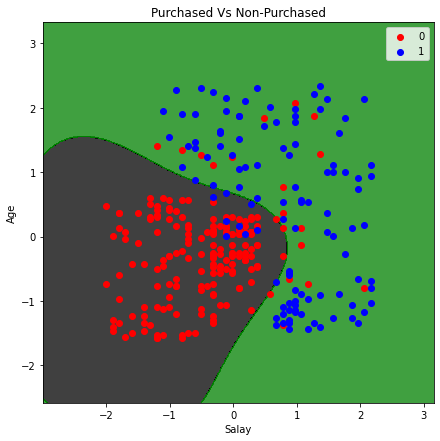

In [13]:
# plotting the fgiure
plt.figure(figsize = (7,7))

# assigning the input values
X_set, y_set = X_train, y_train

# ploting the linear graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)

# labeling the graph
plt.title('Purchased Vs Non-Purchased')
plt.xlabel('Salay')
plt.ylabel('Age')
plt.legend()
plt.show()

# Visualizing predictions (Radial Basis Function kernel)

Let us now visualize the predictions made by the Radial Basis Function kernel. The process will be the same will all the same code, except the dataset.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


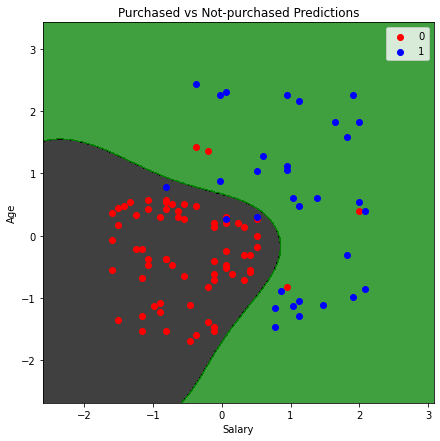

In [14]:
# ploting graph of size 7,7
plt.figure(figsize = (7,7))

# assigning the testing dataset
X_set, y_set = X_test, y_test

# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'blue'))(i), label = j)

# labelling the graphe
plt.title('Purchased vs Not-purchased Predictions')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend()
plt.show()

=====================================================================

=====================================================================

=====================================================================

=====================================================================

# Evaluation of SVM algorithm performance for binary classification

# Linear Kernel
 
Let us first visualize the confusion matrix of our model trained by using a Linear Kernel.

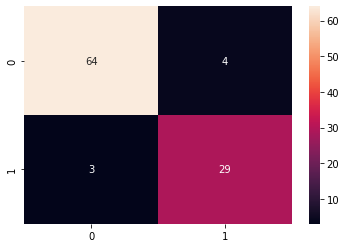

In [15]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

# true Write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

This output shows that 63 of the Non-purchased class were classified correctly, and 25 of the purchased were classified correctly.

========================================================================================

**Nonlinear kernel**

Let us now find the confusion matrix for our model trained using the Radial Basis Function kernel.

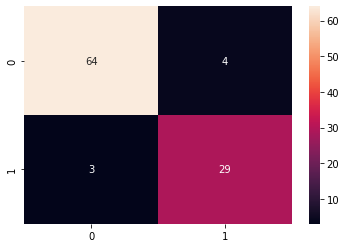

In [16]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred, labels=classifier1.classes_)

# true Write data values in each cell of the matrix
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

This time we get 64 of the non-purchased classified correctly and 29 purchased class classified correctly. We can also print out the classification report for both of our models.

========================================================================================

========================================================================================

========================================================================================

========================================================================================

# Training dataset for multiclass classification using SVM algorithm

**Let us first import the data set from the sklearn module:**

In [17]:
# import scikit-learn dataset library
from sklearn import datasets

# load dataset
dataset = datasets.load_wine()

In [18]:
# print the names of the 13 features
print ("Inputs: ", dataset.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print ("Outputs: ", dataset.target_names)

Inputs:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Outputs:  ['class_0' 'class_1' 'class_2']


verify that it is multiclass classification data by printing out the target values.

In [19]:
# print the wine labels 
print (dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# Training and testing model using multiclass data

In [20]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# input and outputs
inputs = dataset.data
outputs = dataset.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=1)

**Feed the training data to our model and train it using the SVM algorithm.**

In [21]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
classifier1 = SVC(kernel='rbf')

# traininf the model
classifier1.fit(X_train,y_train)

# testing the model
y_pred = classifier1.predict(X_test)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.6851851851851852


**We have used the Radial Basis Function kernel. Let us know train our model using linear kerne to see the difference in prediction accuracy.**

In [22]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
classifier1 = SVC(kernel='linear')

# traininf the model
classifier1.fit(X_train,y_train)

# testing the model
y_pred = classifier1.predict(X_test)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.9629629629629629


# Visualizing the SVM for multiclass classification

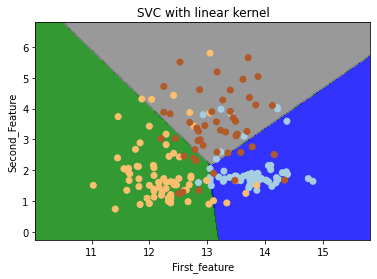

In [23]:
# import some data to play with
from sklearn import svm

# we only take the first two features.
X = dataset.data[:, :2]  
y = dataset.target

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

# SVM regularization parameter
C = 1.0 


#kernel is set to be linear
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)

#Ploting part
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap= ListedColormap(('blue', 'green', 'gray')), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired)
plt.xlabel('First_feature')
plt.ylabel('Second_Feature')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

**the boundaries between different labels are linear, so we need to change the Kernel to the poly in our code to fix that.**

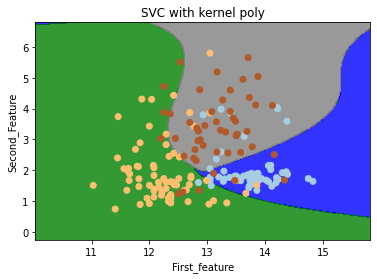

In [24]:
# Kernel is set to be poly
svc = svm.SVC(kernel='poly', C=1,gamma='auto').fit(X, y)

#ploting part
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap= ListedColormap(('blue', 'green', 'gray')), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired)
plt.xlabel('First_feature')
plt.ylabel('Second_Feature')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with kernel poly')
plt.show()

**Note: this time, boundaries are not straight lines. They are curved because we have used a polynomial kernel.**

Let’s visualize the classifier by setting the Kernel as a Radial Basis Function.

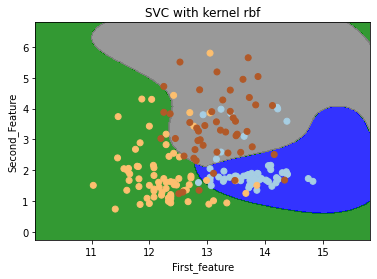

In [25]:
# Kernel is set to be rbf
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)

#ploting part
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap= ListedColormap(('blue', 'green', 'gray')), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired)
plt.xlabel('First_feature')
plt.ylabel('Second_Feature')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with kernel rbf')
plt.show()

# Evaluation of SVM for multiclassification

Now let us evaluate the models by using a confusion matrix. The number of rows/columns will equal the number of target values.

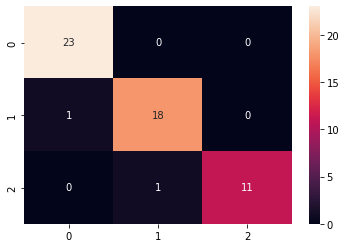

In [26]:
# Importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true Write data values in each cell of the matrix
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

And the confusion matrix for the model trained by using Linear Kernel is:

**Now let us print out the classification score for both models, which will further help us evaluate the models.**

In [28]:
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.95      0.95      0.95        19
           2       1.00      0.92      0.96        12

    accuracy                           0.96        54
   macro avg       0.97      0.95      0.96        54
weighted avg       0.96      0.96      0.96        54

0.9629629629629629
